In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df= pd.read_csv("Loan_default.csv")

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df1 = df.drop(columns =["NumCreditLines","InterestRate","LoanTerm","DTIRatio","Education","EmploymentType",
              "MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner","LoanID"])

In [6]:
df1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,Default
0,56,85994,50587,520,80,0
1,69,50432,124440,458,15,0
2,46,84208,129188,451,26,1
3,32,31713,44799,743,0,0
4,60,20437,9139,633,8,0


In [7]:
x = df1.drop(["Default"],axis =1)
y = df1["Default"]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state= 41, test_size=0.3)

In [9]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=42)

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
y_pred = model.predict(x_test)

In [12]:
print(confusion_matrix(y_pred,y_test))

[[67578  8732]
 [  132   163]]


In [13]:
accuracy_score(y_test,y_pred)

0.8842895372364729

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67710
           1       0.55      0.02      0.04      8895

    accuracy                           0.88     76605
   macro avg       0.72      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605



In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

In [16]:
name = df1.columns

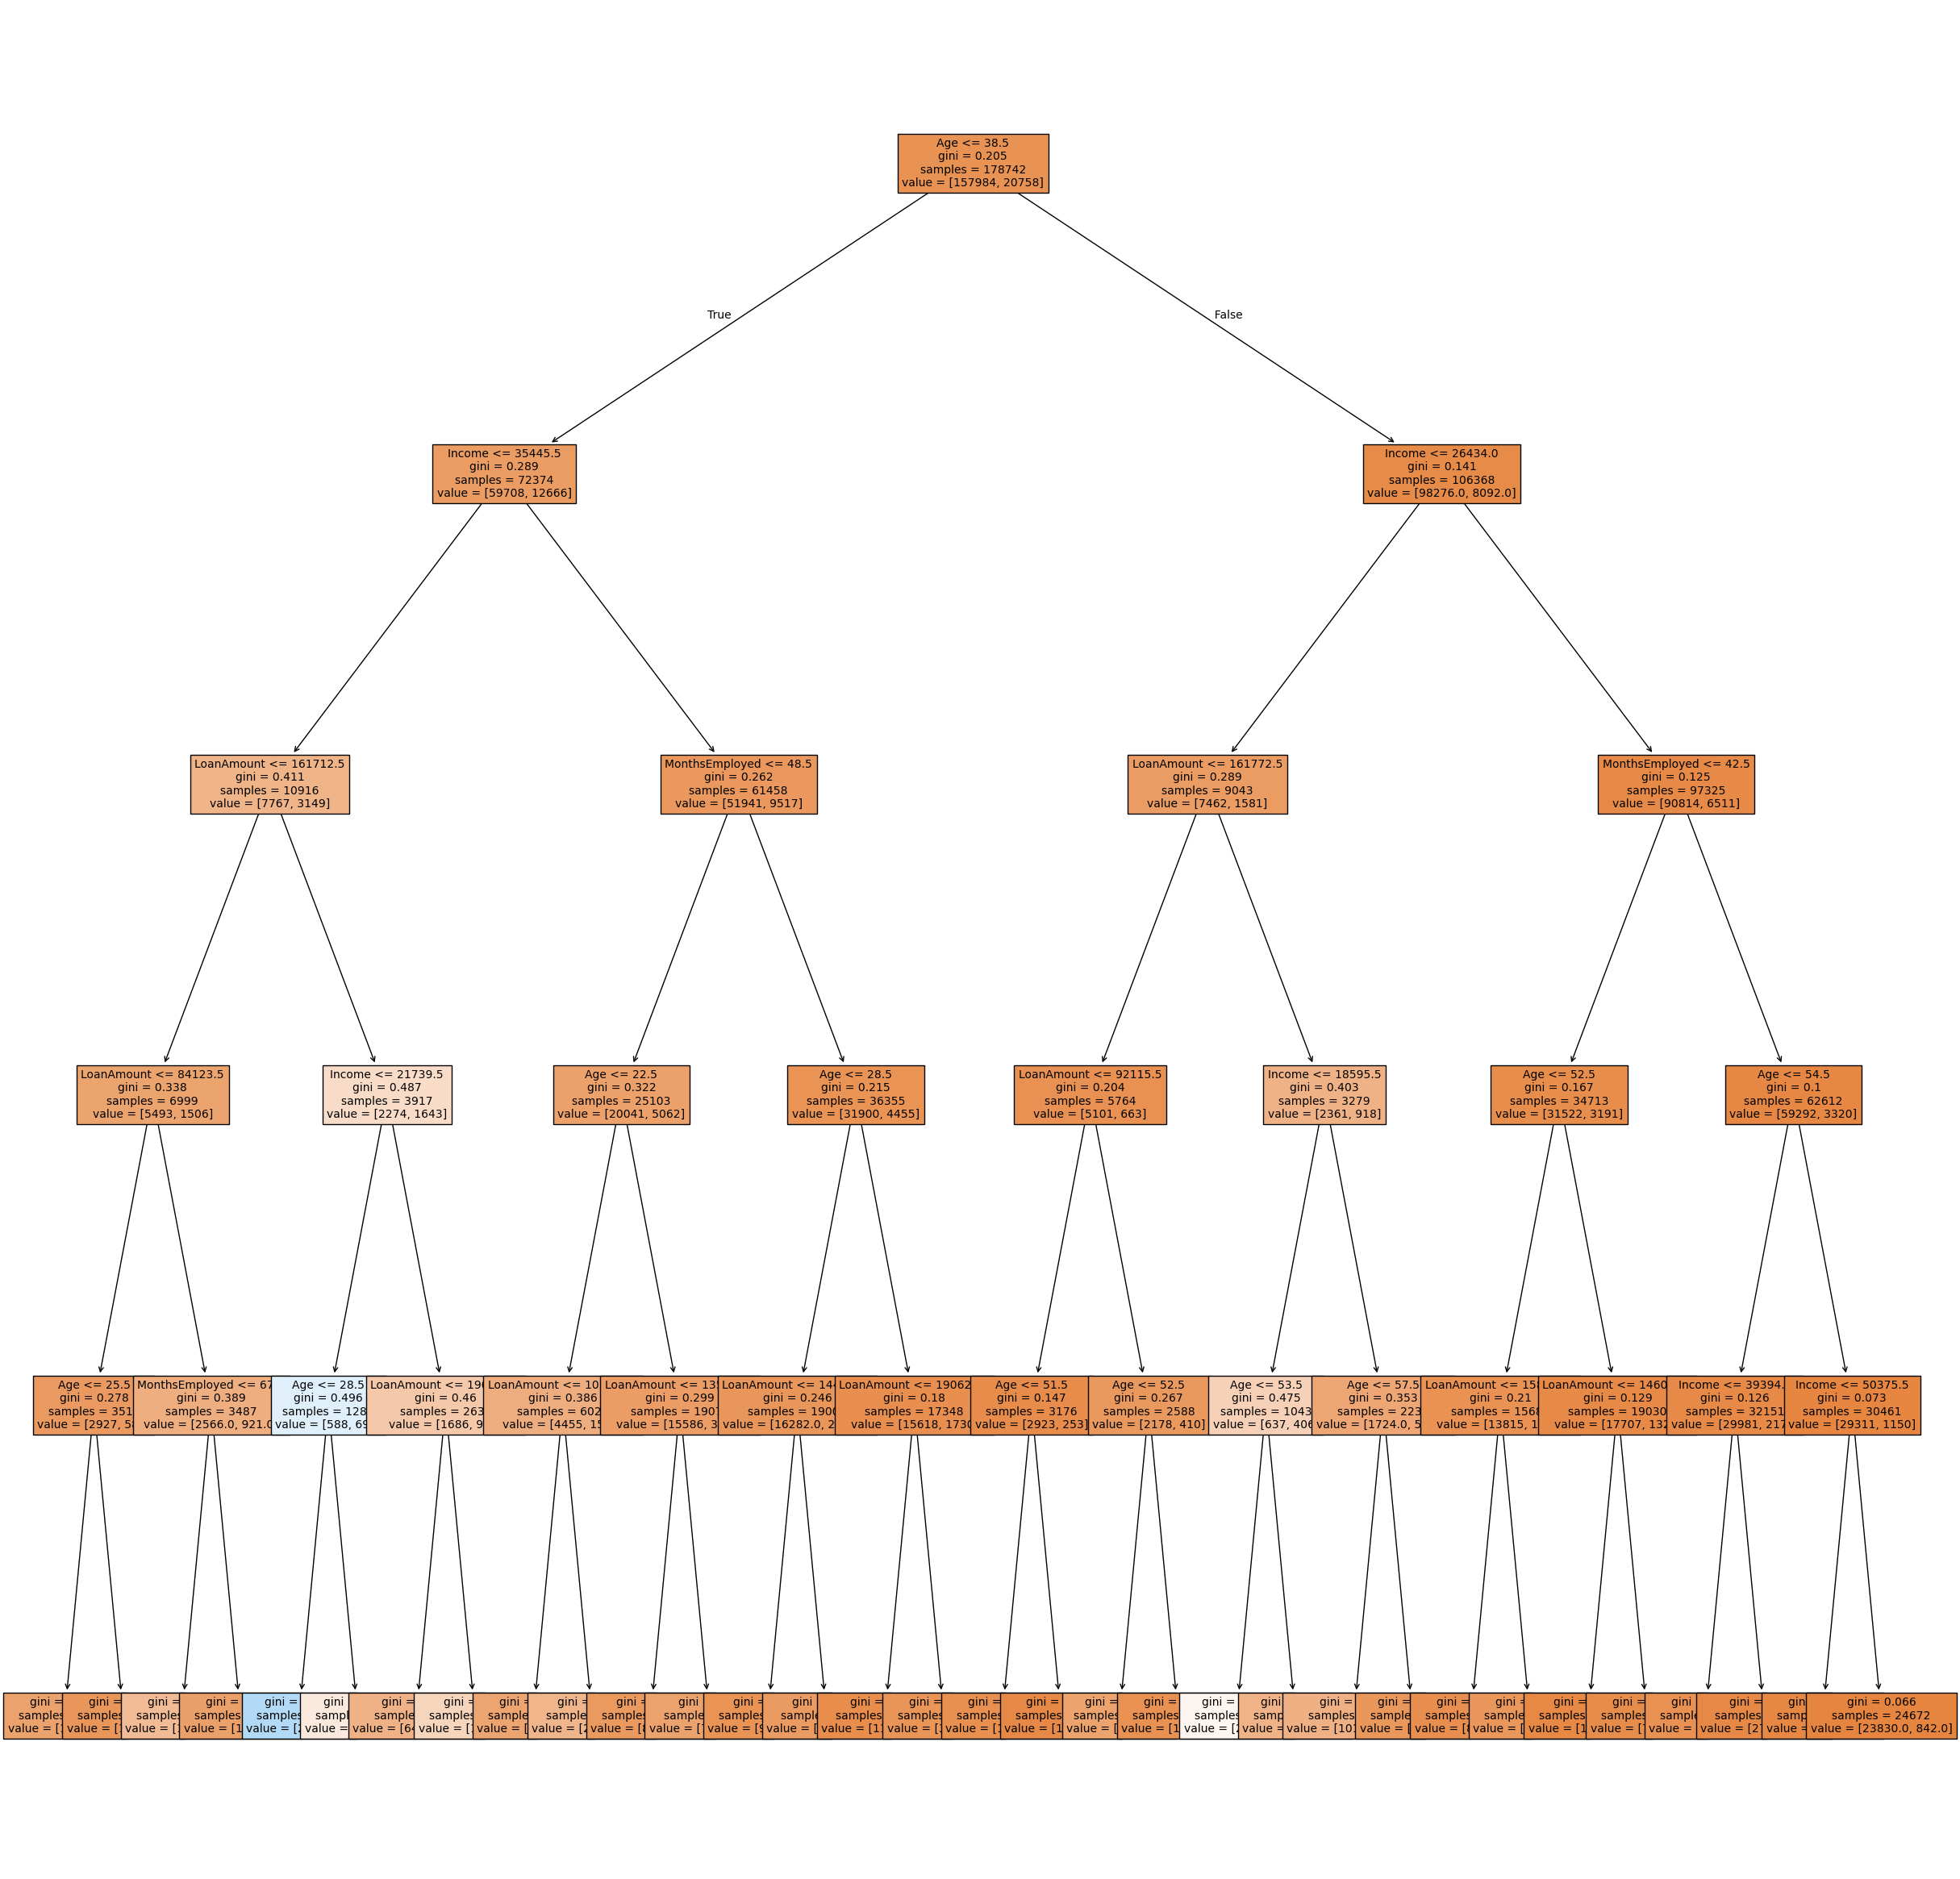

In [45]:
fig = plt.figure(figsize=(30,30))
tree1 = tree.plot_tree(model,feature_names = name,fontsize=10,filled =True)